In [29]:
! pip install -U backtrader

Requirement already up-to-date: backtrader in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (1.9.74.123)


In [ ]:
# Strategy
from datetime import datetime
import backtrader

# Integrate Model
import sys
import warnings
import numpy
import pandas
warnings.filterwarnings('ignore')

# Build Instance and draw single plot
#為了將GUI圖形顯示在 Jupyter notebook 
%matplotlib inline
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot

In [34]:
# 寫出我們的客製化交易策略(讓程式依照這個邏輯進行交易)
def Function_For_Build_Customize_Object(Parameter1, Parameter2):
    
    class Customize_Object(backtrader.Strategy):
        def __init__(self):
    
            self.data_open = self.datas[0].open
            self.data_high = self.datas[0].high
            self.data_low = self.datas[0].low
            self.data_close = self.datas[0].close
            self.data_volume = self.datas[0].volume
               
        def next(self):
            
            
################################################################################################
#                                      Space for Customize Strategy 
#                                           我們把策略寫在這裡
#                                      Space for Customize Strategy   
################################################################################################           
#                                  這裡是我們寫交易邏輯策略的地方            
           
    
            print(pandas.DataFrame({"Open Price": self.data_open[0],
                                    "High Price": self.data_high[0],
                                    "Low Price": self.data_low[0],
                                    "Close Price": self.data_close[0],
                                    "Volumns": self.data_volume[0]},index=[0]))
        
            if self.data_open[0] > self.data_close[-1] :
                self.buy()
                print("Buy")
            if self.data_open[0] < self.data_close[-1] :
                self.sell()
                print("Sell")
              
                
#                                   這裡是我們寫交易邏輯策略的地方  
################################################################################################
#                                      Space for Customize Strategy 
#                                           我們把策略寫在這裡
#                                      Space for Customize Strategy   
################################################################################################            



    return Customize_Object
            

In [ ]:
import yfinance
class PandasData(backtrader.feed.DataBase):
    '''
    The ``dataname`` parameter inherited from ``feed.DataBase`` is the pandas
    DataFrame
    '''

    params = (
        # Possible values for datetime (must always be present)
        #  None : datetime is the "index" in the Pandas Dataframe
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('datetime', None),

        # Possible values below:
        #  None : column not present
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('open', -1),
        ('high', -1),
        ('low', -1),
        ('close', -1),
        ('volume', -1)
    )


In [ ]:
#使用 backtrader Cerebro() 產生策略物件
This_is_trading_object = backtrader.Cerebro()

# 使用 addstrategy 對實例塞入 策略
This_is_trading_object.addstrategy(Function_For_Build_Customize_Object)

# 使用 adddata 對實例塞入 資料
Im_RawData = yfinance.download( tickers = self.Trading_Object_Name,  
                                 interval = self.Trading_DateTime_Interval,
                                 start=self.Trading_DateTime_Start, 
                                 end=self.Trading_DateTime_End)
        
Im_Data = backtrader.feeds.PandasData(dataname=Im_RawData)   
This_is_trading_object.adddata(Im_Data)

# 使用 run運行交易物件
This_is_trading_object.run()


In [35]:
# 使用物件批次產生交易結果
class Trading_Picture_Generator:


    # General
    Trading_Object_Name = ""
    Trading_Level_Multiplier = 1000
    
    Trading_DateTime_Start = datetime(2018,1,1)
    Trading_DateTime_End = datetime(2019,9,22)

    I_Am_Trading_Cerebro_Object = backtrader.Cerebro()
    
    # Parameter Performance Batch
    Parameter_Performance_Batch = []
    
    # Parameter for Customization Strategy
    Customization_Parameter1 = 10 
    Customization_Parameter2 = 20


    def __init__(
        self, 
        Trading_Object_Name_Input, 
        Trading_Level_Multiplier_Input, 
        Trading_DateTime_Start_Input, 
        Trading_DateTime_End_Input):

        self.Trading_Object_Name = Trading_Object_Name_Input
        self.Trading_Level_Multiplier = Trading_Level_Multiplier_Input

        self.Trading_DateTime_Start = Trading_DateTime_Start_Input
        self.Trading_DateTime_End = Trading_DateTime_End_Input


    def Function_RunTrading_Customize(self, Customization_Parameter1, Customization_Parameter2): 

        Cerebro_Object = backtrader.Cerebro()
        Cerebro_Object.broker.setcommission(mult=self.Trading_Level_Multiplier)
        Customize_StrategyObject = Function_For_Build_Customize_Object(Customization_Parameter1, Customization_Parameter2)
        Cerebro_Object.addstrategy(Customize_StrategyObject)

        Im_Data = backtrader.feeds.YahooFinanceData(
            dataname = self.Trading_Object_Name, 
            fromdate=self.Trading_DateTime_Start, 
            todate=self.Trading_DateTime_End)    

        Im_RawData = yfinance.download( tickers = self.Trading_Object_Name,  
                                 interval = self.Trading_DateTime_Interval,
                                 start=self.Trading_DateTime_Start, 
                                 end=self.Trading_DateTime_End)
        
        Im_Data = backtrader.feeds.PandasData(dataname=Im_RawData)            
        
        
        Cerebro_Object.adddata(Im_Data)
        Cerebro_Object.broker.setcash(10000.0)
        Cerebro_Object.run()
        
        self.Customization_Parameter1 = Customization_Parameter1
        self.Customization_Parameter2 = Customization_Parameter2                                            
        self.Trading_Cerebro_Object = Cerebro_Object


    def Function_Plotting_Customize(self) : 

    #    cerebro.plot()
        figure = matplotlib.pyplot.figure(figsize=(24.0, 15.0))
        figure = self.Trading_Cerebro_Object.plot()[0][0]
        figure.savefig('Trading_Plot/Customize/TradingCustomizeStratey_Object[{}]_Position[{}%]_Multiplier[{}].jpg'.format(
            self.Trading_Object_Name,
            self.Trading_Cerebro_Object.broker.getvalue()/100,
            self.Trading_Level_Multiplier))
        matplotlib.pyplot.close(figure)
        matplotlib.pyplot.close("all")
        
        
    def Function_Batch_MultipleParameter(self, Trading_Object_Name_List, Trading_Level_Multiplier_List, Customization_Parameter1_Interval, Customization_Parameter2_Interval):

        try:

            for Specific_Trading_Object_Counter in range(len(Trading_Object_Name_List)):
                for Customization_Parameter1 in range(Customization_Parameter1_Interval[0],Customization_Parameter1_Interval[1]):
                    for Customization_Parameter2 in range(Customization_Parameter2_Interval[0] ,Customization_Parameter2_Interval[1]):

                        self.Trading_Object_Name = Trading_Object_Name_List[Specific_Trading_Object_Counter]
                        self.Trading_Level_Multiplier = Trading_Level_Multiplier_List[Specific_Trading_Object_Counter]
                        self.Function_RunTrading_Customize(Customization_Parameter1 , Customization_Parameter2)
                        self.Parameter_Performance_Batch.append([
                            self.Trading_Object_Name,
                            self.Trading_Cerebro_Object.broker.getvalue()/100,
                            self.Customization_Parameter1,
                            self.Customization_Parameter2])                                            
                        self.Function_Plotting_Customize()
                        
                    self.Function_Plotting_StrategyCombination()

        except:
            
            print(sys.exc_info())
            
            
    def Function_Plotting_StrategyCombination(self) :
        
        X_axsis = numpy.array([])
        Y_axsis = numpy.array([])
        Z_axsis = numpy.array([])
        for data in self.Parameter_Performance_Batch :
            Z_axsis = numpy.append( Z_axsis, data[1])
            Y_axsis = numpy.append( Y_axsis, data[2])
            X_axsis = numpy.append( X_axsis, data[3])
            
        print(X_axsis)        
        print(Y_axsis)
        print(Z_axsis)
        print(self.Parameter_Performance_Batch)        
        ParameterPerformance_Figure = matplotlib.pyplot.figure(figsize=(20,20))
        ax = ParameterPerformance_Figure.add_subplot(111,projection='3d')
        ax.scatter3D(X_axsis, Y_axsis, Z_axsis, c=Z_axsis, s=500, cmap='viridis');
        
        matplotlib.pyplot.show()
        matplotlib.pyplot.close(ParameterPerformance_Figure)
        matplotlib.pyplot.close("all")


2695.89
2682.36
Different : 13.529999999999745
10 Period Avage : 3051.545
2683.73
2695.81
2689.77
9057128032500.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2683.73     2695.89    2682.36      2695.81  3.367250e+09
2714.37
2697.77
Different : 16.59999999999991
10 Period Avage : 3015.389
2697.85
2713.06
2705.455
9573685390300.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2697.85     2714.37    2697.77      2713.06  3.538660e+09
2729.29
2719.07
Different : 10.2199999999998
10 Period Avage : 2980.1100000000006
2719.31
2723.99
2721.6499999999996
10057204378999.998
   Open Price  High Price  Low Price  Close Price       Volumns
0     2719.31     2729.29    2719.07      2723.99  3.695260e+09
2743.45
2727.92
Different : 15.529999999999745
10 Period Avage : 2945.907
2731.33
2743.15
2737.24
8859405728800.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2731.33     2743.45    2727.92      2743.15  3.236620e+09
2748.51
27

   Open Price  High Price  Low Price  Close Price       Volumns
0     2614.41     2659.07    2609.72      2640.87  3.565990e+09
2638.3
2553.8
Different : 84.5
10 Period Avage : 2647.2659999999996
2633.45
2581.88
2607.665
9383734655800.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2633.45      2638.3     2553.8      2581.88  3.598520e+09
2619.14
2575.49
Different : 43.65000000000009
10 Period Avage : 2637.4189999999994
2592.17
2614.45
2603.31
8832536201100.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2592.17     2619.14    2575.49      2614.45  3.392810e+09
2649.86
2573.61
Different : 76.25
10 Period Avage : 2630.194
2584.04
2644.69
2614.365
8759011634099.999
   Open Price  High Price  Low Price  Close Price       Volumns
0     2584.04     2649.86    2573.61      2644.69  3.350340e+09
2672.08
2649.58
Different : 22.5
10 Period Avage : 2625.2849999999994
2657.36
2662.84
2660.1000000000004
8456378097000.001
   Open Price  High Price  Lo

Different : 44.26999999999998
10 Period Avage : 2765.0000000000005
2742.94
2717.07
2730.005
9978386675400.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2742.94     2742.94    2698.67      2717.07  3.655080e+09
2732.91
2715.6
Different : 17.309999999999945
10 Period Avage : 2758.621
2722.12
2723.06
2722.59
9679052483100.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2722.12     2732.91     2715.6      2723.06  3.555090e+09
2746.09
2699.38
Different : 46.710000000000036
10 Period Avage : 2751.0209999999997
2728.45
2699.63
2714.04
10248459303600.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2728.45     2746.09    2699.38      2699.63  3.776090e+09
2724.34
2691.99
Different : 32.350000000000364
10 Period Avage : 2744.4030000000002
2698.69
2716.31
2707.5
9281689050000.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2698.69     2724.34    2691.99      2716.31  3.428140e+09
2743.26
2718.03
Dif

   Open Price  High Price  Low Price  Close Price       Volumns
0      2906.6     2912.36    2903.82      2907.95  3.280020e+09
2934.8
2919.73
Different : 15.070000000000164
10 Period Avage : 2896.659
2919.73
2930.75
2925.24
9763661305200.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2919.73      2934.8    2919.73      2930.75  3.337730e+09
2940.91
2927.11
Different : 13.799999999999727
10 Period Avage : 2902.4579999999996
2936.76
2929.67
2933.215
16448325766150.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2936.76     2940.91    2927.11      2929.67  5.607610e+09
2923.79
2912.63
Different : 11.159999999999854
10 Period Avage : 2906.682
2921.83
2919.37
2920.6
9848876526000.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2921.83     2923.79    2912.63      2919.37  3.372210e+09
2923.95
2913.7
Different : 10.25
10 Period Avage : 2909.4489999999996
2921.75
2915.56
2918.6549999999997
9589182629400.0
   Open Price  

11203434424950.002
   Open Price  High Price  Low Price  Close Price       Volumns
0      2794.1      2794.1    2764.24      2781.01  4.019090e+09
2775.99
2722.0
Different : 53.98999999999978
10 Period Avage : 2747.951
2773.93
2726.22
2750.075
10095332819750.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2773.93     2775.99     2722.0      2726.22  3.670930e+09
2754.6
2714.98
Different : 39.61999999999989
10 Period Avage : 2751.906
2730.05
2722.18
2726.115
11153735955600.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2730.05      2754.6    2714.98      2722.18  4.091440e+09
2746.8
2685.75
Different : 61.05000000000018
10 Period Avage : 2750.8900000000003
2737.9
2701.58
2719.74
11973301783800.0
   Open Price  High Price  Low Price  Close Price       Volumns
0      2737.9      2746.8    2685.75      2701.58  4.402370e+09
2735.38
2670.75
Different : 64.63000000000011
10 Period Avage : 2749.873
2693.52
2730.2
2711.8599999999997
113332426003

10 Period Avage : 2698.364
2692.36
2707.88
2700.12
9780725679600.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2692.36     2708.07    2681.83      2707.88  3.622330e+09
2718.05
2703.79
Different : 14.260000000000218
10 Period Avage : 2704.959
2712.4
2709.8
2711.1000000000004
9114636867000.002
   Open Price  High Price  Low Price  Close Price       Volumns
0      2712.4     2718.05    2703.79       2709.8  3.361970e+09
2748.19
2722.61
Different : 25.579999999999927
10 Period Avage : 2715.432
2722.61
2744.73
2733.67
10463860015900.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2722.61     2748.19    2722.61      2744.73  3.827770e+09
2761.85
2748.63
Different : 13.2199999999998
10 Period Avage : 2722.63
2750.3
2753.03
2751.665
10100729332050.0
   Open Price  High Price  Low Price  Close Price       Volumns
0      2750.3     2761.85    2748.63      2753.03  3.670770e+09
2757.9
2731.23
Different : 26.670000000000073
10 Period Avage : 2726.

2908.89
2932.47
2920.68
9292201833600.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2908.89     2937.32    2898.21      2932.47  3.181520e+09
2913.03
2862.6
Different : 50.43000000000029
10 Period Avage : 2928.557
2913.03
2884.05
2898.54
10919090034000.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2913.03     2913.03     2862.6      2884.05  3.767100e+09
2897.96
2873.28
Different : 24.679999999999836
10 Period Avage : 2923.7740000000003
2879.61
2879.42
2879.5150000000003
10037384591850.002
   Open Price  High Price  Low Price  Close Price       Volumns
0     2879.61     2897.96    2873.28      2879.42  3.485790e+09
2875.97
2836.4
Different : 39.56999999999971
10 Period Avage : 2918.229
2859.84
2870.72
2865.2799999999997
10426238169600.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2859.84     2875.97     2836.4      2870.72  3.638820e+09
2891.31
2825.39
Different : 65.92000000000007
10 Period Avage : 2912.381


   Open Price  High Price  Low Price  Close Price       Volumns
0     3016.22      3017.4    2958.08      2980.38  4.623430e+09
3013.59
2945.23
Different : 68.36000000000013
10 Period Avage : 2998.4290000000005
2980.32
2953.56
2966.94
14129458362000.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     2980.32     3013.59    2945.23      2953.56  4.762300e+09
2945.5
2914.11
Different : 31.389999999999873
10 Period Avage : 2993.973
2943.9
2932.05
2937.9750000000004
11383654213500.002
   Open Price  High Price  Low Price  Close Price       Volumns
0      2943.9      2945.5    2914.11      2932.05  3.874660e+09
2898.07
2822.12
Different : 75.95000000000027
10 Period Avage : 2979.9440000000004
2898.07
2844.74
2871.4049999999997
12960746890649.998
   Open Price  High Price  Low Price  Close Price       Volumns
0     2898.07     2898.07    2822.12      2844.74  4.513730e+09
2884.4
2847.42
Different : 36.98000000000002
10 Period Avage : 2967.574
2861.18
2881.77
2871.475
1192

3022.55
3012.9350000000004
10154705735950.002
   Open Price  High Price  Low Price  Close Price       Volumns
0     3003.32     3027.39    3001.94      3022.55  3.370370e+09
3044.08
3032.12
Different : 11.960000000000036
10 Period Avage : 3004.9010000000003
3032.12
3039.42
3035.77
10689644397100.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     3032.12     3044.08    3032.12      3039.42  3.521230e+09
3047.87
3034.81
Different : 13.059999999999945
10 Period Avage : 3009.0220000000004
3035.39
3036.89
3036.14
10899530070200.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     3035.39     3047.87    3034.81      3036.89  3.589930e+09
3050.1
3025.96
Different : 24.139999999999873
10 Period Avage : 3014.7300000000005
3039.74
3046.77
3043.255
11491422177650.0
   Open Price  High Price  Low Price  Close Price       Volumns
0     3039.74      3050.1    3025.96      3046.77  3.776030e+09
3046.9
3023.19
Different : 23.710000000000036
10 Period Avage : 301

<Figure size 1728x1080 with 0 Axes>

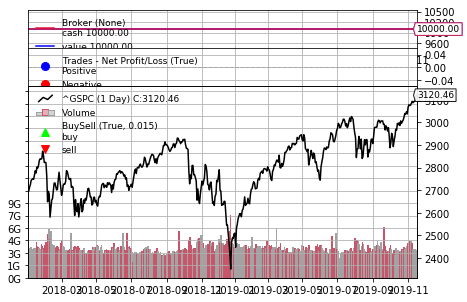

In [36]:
# Customize

I_Am_Trading_Instance = Trading_Picture_Generator("^GSPC", 1000, datetime(2018,1,1), datetime(2019,11,16))
I_Am_Trading_Instance.Function_RunTrading_Customize("No_using")
I_Am_Trading_Instance.Function_Plotting_Customize()